# Analisis Exploratorio y Visualización de Datos - Olimpiadas

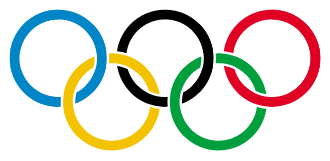

Autor: Osvaldo Ceballos

Profesor: Miguel Carrasco

## Introducción

El objetivo de este trabajo es realizar un análisis exploratorio de datos para un conjunto de datos
reales, y aplicar los conceptos básicos del análisis exploratorio de datos para un problema sencillo
utilizando el lenguaje Python.

## Desarrollo
El comité olímpico tiene registros de 271,116 deportistas que han participado en las Olimpiadas, desde
Atenas 1896 hasta Rio 2016. El comité desea usar los datos con fines científicos y documentales; para
lo cual necesita que usted realice un análisis exploratorio en búsqueda de contenido interesante.



### Importación del dataset




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
events_df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')

### A.- Análisis Descriptivo Básico del Dataset
Los datos consisten en 4 variables numéricas:
* Age, edad del atleta;
* Height, altura en centímetros del atleta;
* Weight, peso en kilogramos del atleta;
* Year, año de la olimpiada)

y 10 variables categóricas:
* Name, nombre del atleta;
* Sex, género del atleta;
* Team, equipo del atleta;
* NOC, “comité nacional olímpico” relacionado al atleta;
* Games, año y temporada de la olimpiada;
* Season, temporada de la olimpiada;
* City, ciudad donde se realizó la olimpiada;
* Sport, deporte realizado;
* Event, nombre del evento;
* Medal, en caso de haber ganado algún puesto en la competición, medalla recibida).

Todos los datos existentes se encuentran en un archivo llamado athlete_events.


Revisaremos una muestra de 5 observacionaes de cada dataframe usando sample, también revisaremos la estructura con la función info, y finalmente revisaremos 2 reportes estadisticos descriptivos básicos para las variables numéricas del dataframe y para las variables categóricas.

In [ ]:
events_df.sample(5)

ID                             Name Sex   Age  Height  Weight  \
207622  104193              Charnvudth Saengsri   M  17.0   175.0    75.0   
173549   87204                  Katarzyna Nowak   F  23.0   173.0    60.0   
250023  125225            Anderson Frana Varejo   M  29.0   211.0   118.0   
150793   75661               Natalie Martindale   F  19.0     NaN     NaN   
93576    47372  Yrj Anselm Helander (-Helanter)   M  28.0   175.0    59.0   

                                    Team  NOC        Games  Year  Season  \
207622                          Thailand  THA  2004 Summer  2004  Summer   
173549                            Poland  POL  1992 Summer  1992  Summer   
250023                            Brazil  BRA  2012 Summer  2012  Summer   
150793  Saint Vincent and the Grenadines  VIN  1996 Summer  1996  Summer   
93576                            Finland  FIN  1924 Summer  1924  Summer   

             City       Sport                                Event Medal  
207622     Athina    Swimming  Swimming Men's 400 metres Freestyle   NaN  
173549  Barcelona      Tennis               Tennis Women's Singles   NaN  
250023     London  Basketball          Basketball Men's Basketball   NaN  
150793    Atlanta   Athletics         Athletics Women's 100 metres   NaN  
93576       Paris   Athletics           Athletics Men's Pole Vault   NaN

In [ ]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Con lo anterior se observa que tenemos 1 variable de ID (que convertiremos a categórica), 10 variables categóricas y 4 numéricas.

Se observa que tanto Edad (Age),  Altura (Height), Peso (Weight) tienen valores nulos, para el caso de la varaible Medal, vamos a asumir que los valores nulos simplemente significa que no tienen medallas.

In [ ]:
events_df['ID'] = events_df['ID'].astype('object')
events_df.set_index(['ID'],inplace=True)
events_df.describe(include='object')

Name     Sex           Team     NOC        Games  \
count                 271116  271116         271116  271116       271116   
unique                134732       2           1184     230           51   
top     Robert Tait McKenzie       M  United States     USA  2000 Summer   
freq                      58  196594          17847   18853        13821   

        Season    City      Sport                    Event  Medal  
count   271116  271116     271116                   271116  39783  
unique       2      42         66                      765      3  
top     Summer  London  Athletics  Football Men's Football   Gold  
freq    222552   22426      38624                     5733  13372

In [ ]:
#Y ahora para las características numéricas
events_df.describe()

Age         Height         Weight           Year
count  261642.000000  210945.000000  208241.000000  271116.000000
mean       25.556898     175.338970      70.702393    1978.378480
std         6.393561      10.518462      14.348020      29.877632
min        10.000000     127.000000      25.000000    1896.000000
25%        21.000000     168.000000      60.000000    1960.000000
50%        24.000000     175.000000      70.000000    1988.000000
75%        28.000000     183.000000      79.000000    2002.000000
max        97.000000     226.000000     214.000000    2016.000000

Vemos que el Atleta con más participaciones es Robert Tait McKenzie con 58 participaciones. El género másculino es mayoritario en participaciones deportivas (historicas, mas adelante revisaremos eso).
El equipo que mas deportitas/participaciones tiene es USA.


In [ ]:
regions_df.sample(5)

NOC       region        notes
7    ANZ    Australia  Australasia
164  PRK  North Korea          NaN
157  PER         Peru          NaN
25   BLR      Belarus          NaN
105  KAZ   Kazakhstan          NaN

Aprovecharemos de incluir la información de la región de regions_df añadiendola al dataframe de events_df

In [ ]:
events_df = events_df.merge(regions_df[['NOC','region']],
                            on = 'NOC',
                            how = 'left')

In [ ]:
events_df.sample(5)

Name Sex   Age  Height  Weight      Team  NOC  \
217253  Shazada Muhammad Shah-Rukh   M  21.0     NaN     NaN  Pakistan  PAK   
152305               Ivar Mathisen   M  28.0     NaN     NaN    Norway  NOR   
55163     Rodobaldo Daz Arrambarry   M  26.0   178.0    71.0      Cuba  CUB   
223271          Kristina migun-Vhi   F  28.0   168.0    59.0   Estonia  EST   
100849          Lars Erik Humlekjr   M  29.0   183.0    80.0    Norway  NOR   

              Games  Year  Season         City                 Sport  \
217253  1948 Summer  1948  Summer       London                Hockey   
152305  1948 Summer  1948  Summer       London              Canoeing   
55163   1968 Summer  1968  Summer  Mexico City             Athletics   
223271  2006 Winter  2006  Winter       Torino  Cross Country Skiing   
100849  2000 Summer  2000  Summer       Sydney               Archery   

                                             Event Medal    region  
217253                         Hockey Men's Hockey   NaN  Pakistan  
152305  Canoeing Men's Kayak Doubles, 1,000 metres   NaN    Norway  
55163         Athletics Men's 4 x 400 metres Relay   NaN      Cuba  
223271  Cross Country Skiing Women's 30 kilometres   NaN   Estonia  
100849                          Archery Men's Team   NaN    Norway

## A.- Análisis descriptivo por variable.

#### Name
Veremos el top 10 de los atletas con más participaciones ene eventos, para ello creamos un dataframe con los nombres (aprovechamos de incluir la nacionalidad para mayor inforfmación)

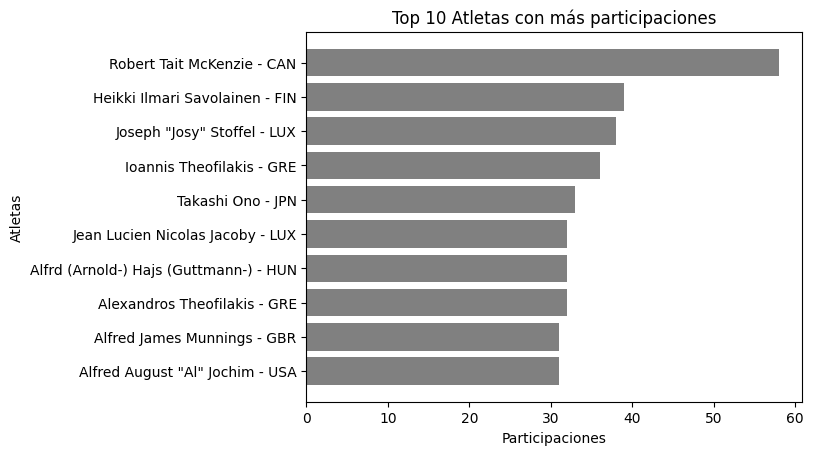

In [ ]:
#Veremos el top 10 de los atletas con más participaciones ene eventos, para ello creamos un dataframe con los nombres (aprovechamos de incluir la nacionalidad para mayor inforfmación)
top_10_name = (events_df['Name']+' - '+events_df['NOC']).value_counts().head(10).sort_values(ascending=True)


#Gráfico de barra horizonata usando matplotlib
plt.figure()
plt.barh(top_10_name.index,top_10_name.values, color = 'gray')
plt.xticks(rotation=0)
plt.xlabel('Participaciones')
plt.ylabel('Atletas')
plt.title('Top 10 Atletas con más participaciones')
plt.show()

Se observa el caso de Robert Tait McKenzie quien participaba en escultura (que era una disciplina olimpica de antaño), y de Heikki Savolainen (Gimasia Masculina) quienes se desempeñaron en una cantidad importante de JJ.OO en la 1era mitad del siglo 20

Heikki Savolainen - Finlandia - Gimnasia Masculina

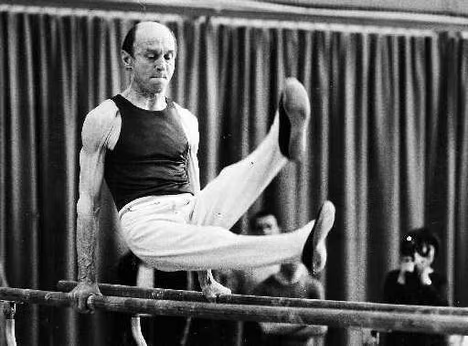



Robert Tait McKenzie - Escultura
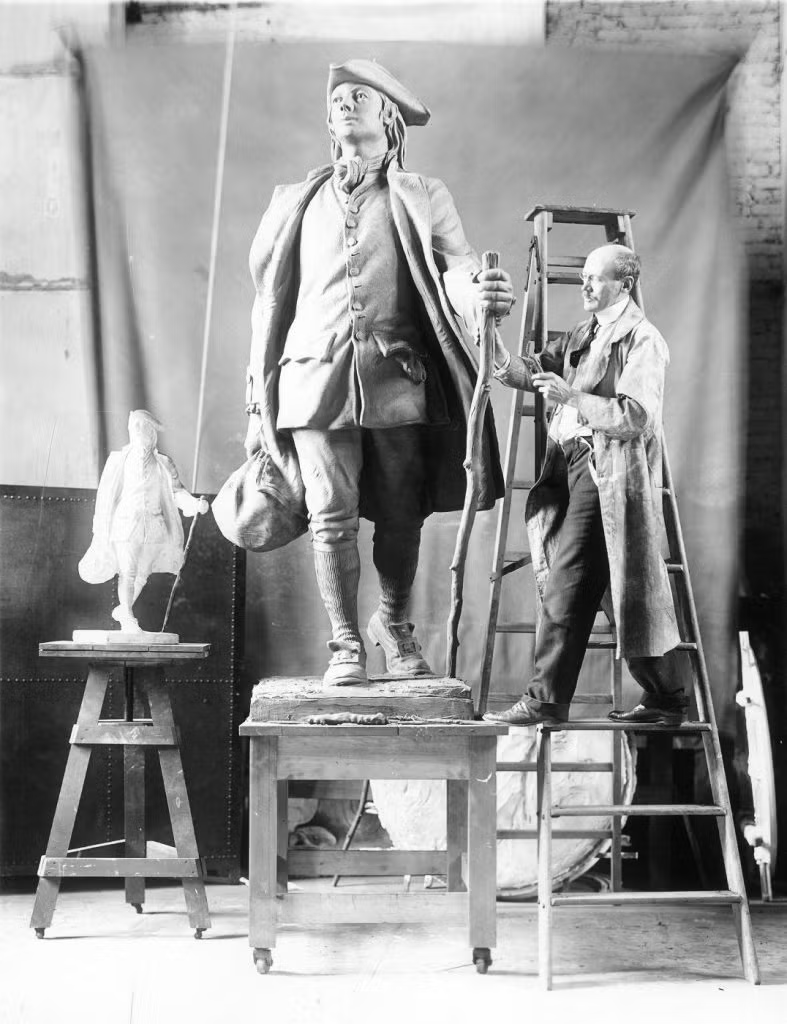

#### Genero (sex)
Revisamos el total de participaciones por género. Se observa una enorme diferencia entre las participaciones de atletas por género, veremos en el punto 2 si es producto de la incorporación tardía en la historía de disciplinas o eventos fememninos o bien, es una discriminación que se mantiene.

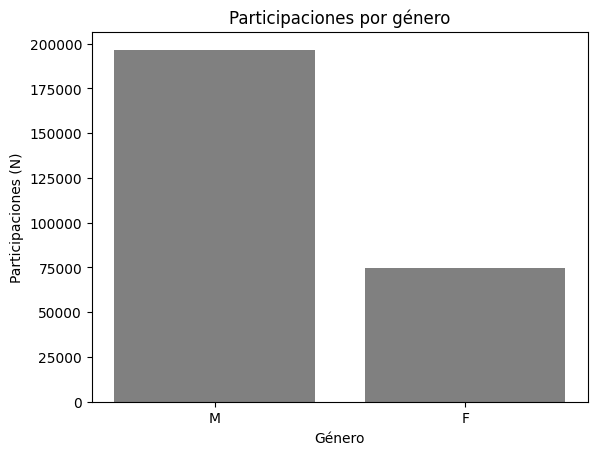

In [ ]:
#Veremos el total por género

sex_plt = events_df['Sex'].value_counts()

#Gráfico de barras vertical para la variable género
plt.figure()
plt.bar(sex_plt.index, sex_plt.values, color = 'gray')
plt.xticks(rotation=0)
plt.xlabel('Género')
plt.ylabel('Participaciones (N)')
plt.title('Participaciones por género')
plt.show()

#### Edad (Age)
Vemos la distribución de la edad es bien asimétrica, y con una presencia importante de outliers.

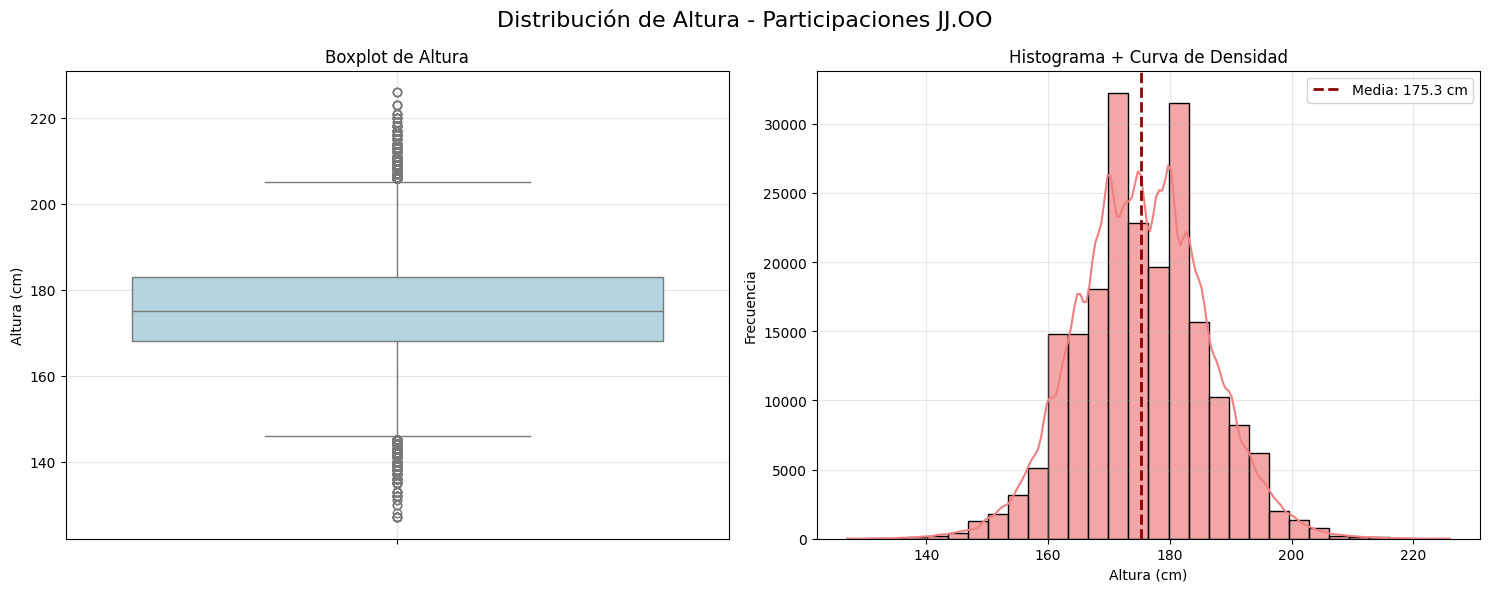

In [ ]:
# Limpiar datos (remover valores NaN en Height)
clean_height_data = events_df['Height'].dropna()


# Boxplot Con histograma más detallado usando seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Boxplot (igual que antes)
sns.boxplot(y=clean_height_data, color='lightblue', ax=ax1)
ax1.set_title('Boxplot de Altura')
ax1.set_ylabel('Altura (cm)')
ax1.grid(True, alpha=0.3)

# Subplot 2: Histograma con curva de densidad usando seaborn
sns.histplot(clean_height_data, bins=30, kde=True, color='lightcoral',
            alpha=0.7, ax=ax2)
ax2.set_title('Histograma + Curva de Densidad')
ax2.set_xlabel('Altura (cm)')
ax2.set_ylabel('Frecuencia')
ax2.grid(True, alpha=0.3)

# Añadir línea de media
mean_height = clean_height_data.mean()
ax2.axvline(mean_height, color='darkred', linestyle='--', linewidth=2,
           label=f'Media: {mean_height:.1f} cm')
ax2.legend()

plt.suptitle('Distribución de Altura - Participaciones JJ.OO', fontsize=16)
plt.tight_layout()
plt.show()

#### Altura (Height)
Vemos que la distribución de la altura es bastante simétrica, y se podría asumir normalidad (bajo test que no realizaremos en este trabajo). El balance puede estar dado porque hay disciplinas que requieren altura vs otras en que sería una desventaja.

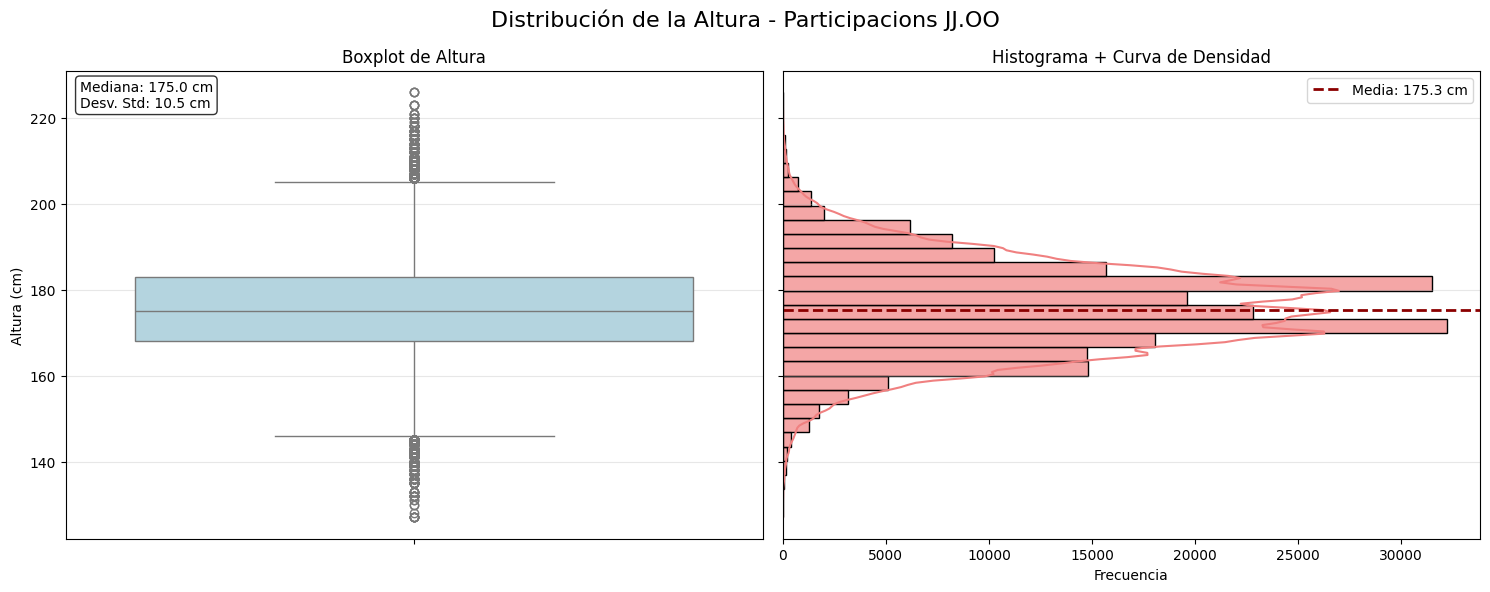

In [ ]:
# Vemos la distribución de la altura de las participaciones en JJ.OO
# Limpiar datos (remover valores NaN en Height)
clean_height_data = events_df['Height'].dropna()


# Boxplot Con histograma usando seaborn y matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Subplot 1: Boxplot vertical con seaborn
sns.boxplot(y=clean_height_data, color='lightblue', ax=ax1)
ax1.set_title('Boxplot de Altura')
ax1.set_ylabel('Altura (cm)')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir estadísticas al boxplot usando el describe de pandas
stats = clean_height_data.describe()
ax1.text(0.02, 0.98, f'Mediana: {stats["50%"]:.1f} cm\nDesv. Std: {stats["std"]:.1f} cm',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Subplot 2: Histograma HORIZONTAL con seaborn
sns.histplot(y=clean_height_data, bins=30, kde=True, color='lightcoral',
            alpha=0.7, ax=ax2)
ax2.set_title('Histograma + Curva de Densidad')
ax2.set_xlabel('Frecuencia')
ax2.set_ylabel('')  # Truco para quitar el label del eje Y ya que se comparte
ax2.grid(True, alpha=0.3, axis='y')

# Añadir línea de media HORIZONTAL
ax2.axhline(stats["mean"], color='darkred', linestyle='--', linewidth=2,
           label=f'Media: {stats["mean"]:.1f} cm')
ax2.legend()
plt.suptitle('Distribución de la Altura - Participacions JJ.OO', fontsize=16)
plt.tight_layout()
plt.show()

#### Peso (Weight)
Vemos que el peso tiene un sesgo a la derecha, determinado por que la mayoría de las disciplinas privilegian bajo peso (o normal) pero algunas disciplinas es muy importante contar con una gran masa.

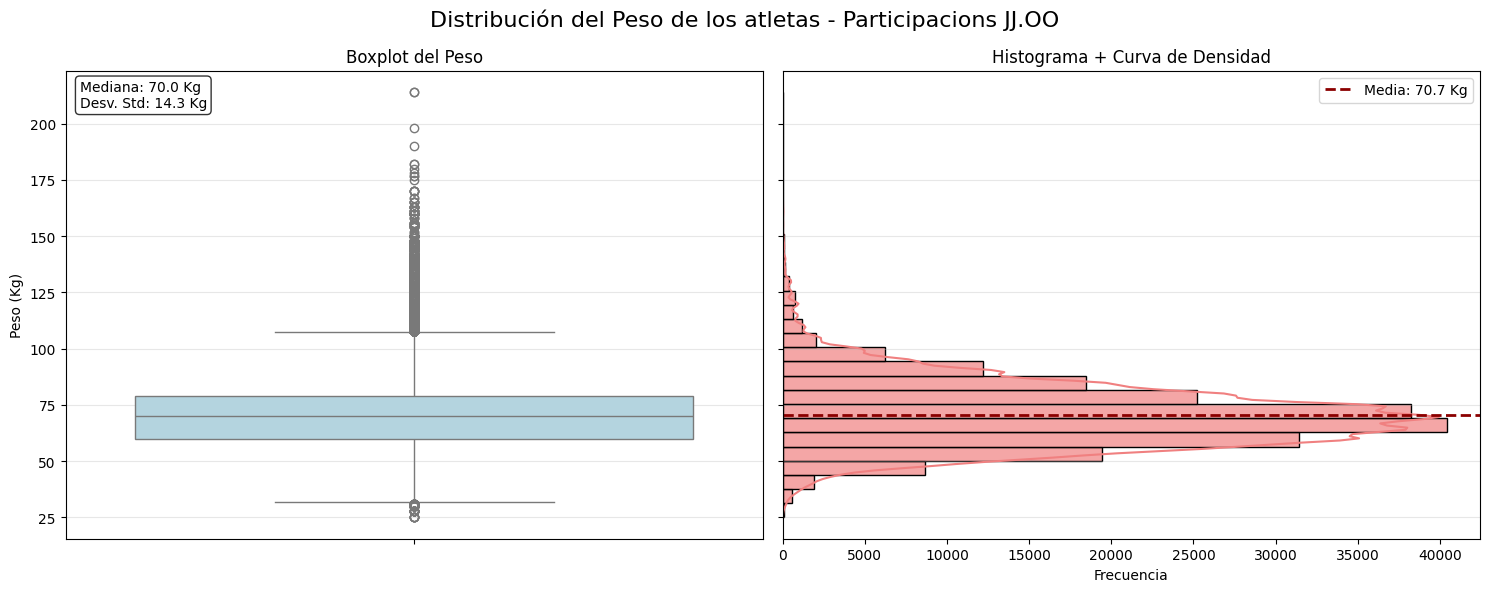

In [ ]:
#Para revisar el peso de los atletas participantes, revisaremos el boxplot acompañado de su distribución
# Limpiar datos (remover valores NaN en Weight)
clean_peso_data = events_df['Weight'].dropna()


# Boxplot Con histograma usando seaborn y matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Subplot 1: Boxplot vertical con seaborn
sns.boxplot(y=clean_peso_data, color='lightblue', ax=ax1)
ax1.set_title('Boxplot del Peso')
ax1.set_ylabel('Peso (Kg)')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir estadísticas al boxplot usando el describe de pandas
stats = clean_peso_data.describe()
ax1.text(0.02, 0.98, f'Mediana: {stats["50%"]:.1f} Kg\nDesv. Std: {stats["std"]:.1f} Kg',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Subplot 2: Histograma HORIZONTAL con seaborn
sns.histplot(y=clean_peso_data, bins=30, kde=True, color='lightcoral',
            alpha=0.7, ax=ax2)
ax2.set_title('Histograma + Curva de Densidad')
ax2.set_xlabel('Frecuencia')
ax2.set_ylabel('')  # Truco para quitar el label del eje Y ya que se comparte
ax2.grid(True, alpha=0.3, axis='y')

# Añadir línea de media HORIZONTAL
ax2.axhline(stats["mean"], color='darkred', linestyle='--', linewidth=2,
           label=f'Media: {stats["mean"]:.1f} Kg')
ax2.legend()
plt.suptitle('Distribución del Peso de los atletas - Participacions JJ.OO', fontsize=16)
plt.tight_layout()
plt.show()

#### Equipo (Teams)
Veremos el top 20 de los equipos con más participaciones ene eventos, para ello creamos un dataframe con los nombres de los equipos (federaciones).



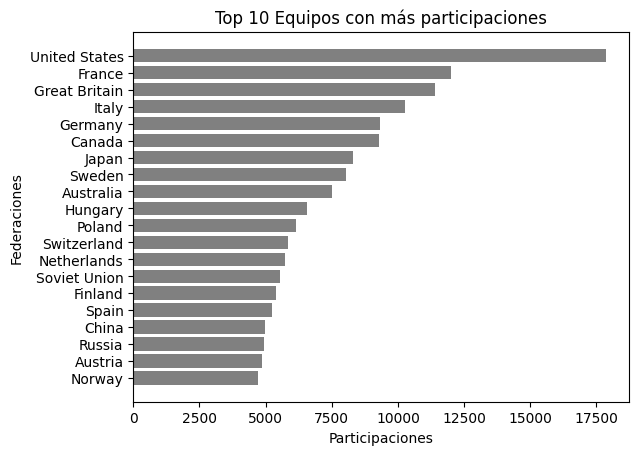

In [ ]:
#Veremos el top 20 de los equipos con más participaciones ene eventos, para ello creamos un dataframe con los nombres de los equipos (federaciones)
top_10_name = events_df['Team'].value_counts().head(20).sort_values(ascending=True)


#Gráfico de barras horizonates de matplotlib
plt.figure()
plt.barh(top_10_name.index,top_10_name.values, color = 'gray')
plt.xticks(rotation=0)
plt.xlabel('Participaciones')
plt.ylabel('Federaciones')
plt.title('Top 10 Equipos con más participaciones')
plt.show()

#### Año y temporada ( Year / Season)
Revisaremos la cantdad de participaciones en la historia por Juegos de invierno y verano. Ambas variables estan relacionads así que lo revisaremos en el mismo gráfico.

Se observa, la preponderancia de los juegos de verano, con muchas mas disciplinas y deportistas, aunque también se ve la tendencia positiva con cada vez mas participacioens en las dos temporadas

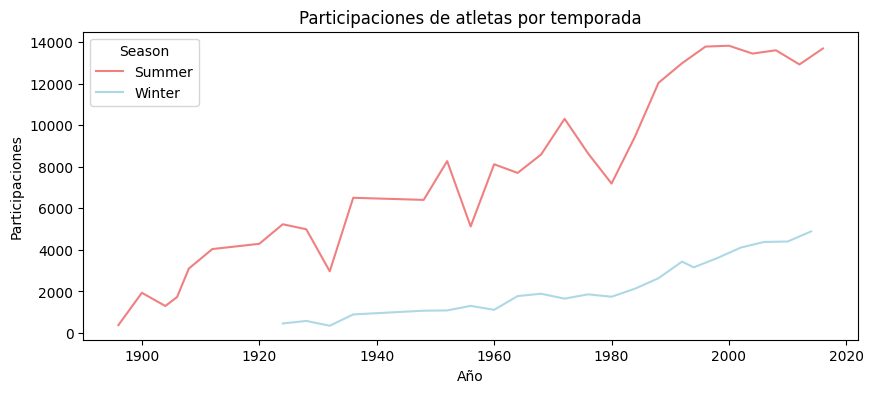

In [ ]:
#Revisaremos la cantdad de participaciones en la historia por Juegos de invierno y verano.
year_season_df = events_df.groupby(['Year', 'Season']).size().reset_index(name='atletas')

#Paleta de colores para el lineplot de seaborn
custom_colors = ['lightcoral', 'lightblue']

# Gráfico, usando seaborn para los gráficos de linea
plt.figure(figsize = (10,4))
sns.lineplot(data = year_season_df, x = 'Year',y ='atletas' ,palette=custom_colors ,hue = 'Season')
plt.xlabel('Año')
plt.ylabel('Participaciones')
plt.title('Participaciones de atletas por temporada')
plt.show()

#### Ciudad (City)
Veremos las 10 ciudades que mas participaciones de atletas han tenido, le sumamos el año de los JJOO para visualizar correctamente que juego tuvo mas participacioens de atletas.

Se observa que los JJ.OO de Sydney 2000 fueron los que tuvieron mas participaciones de la historia, como regla general después del fin de la guerra fria y el avanze de la globalización, se ve que juegos mas recientes tienen mayor cantidad de participaciones.

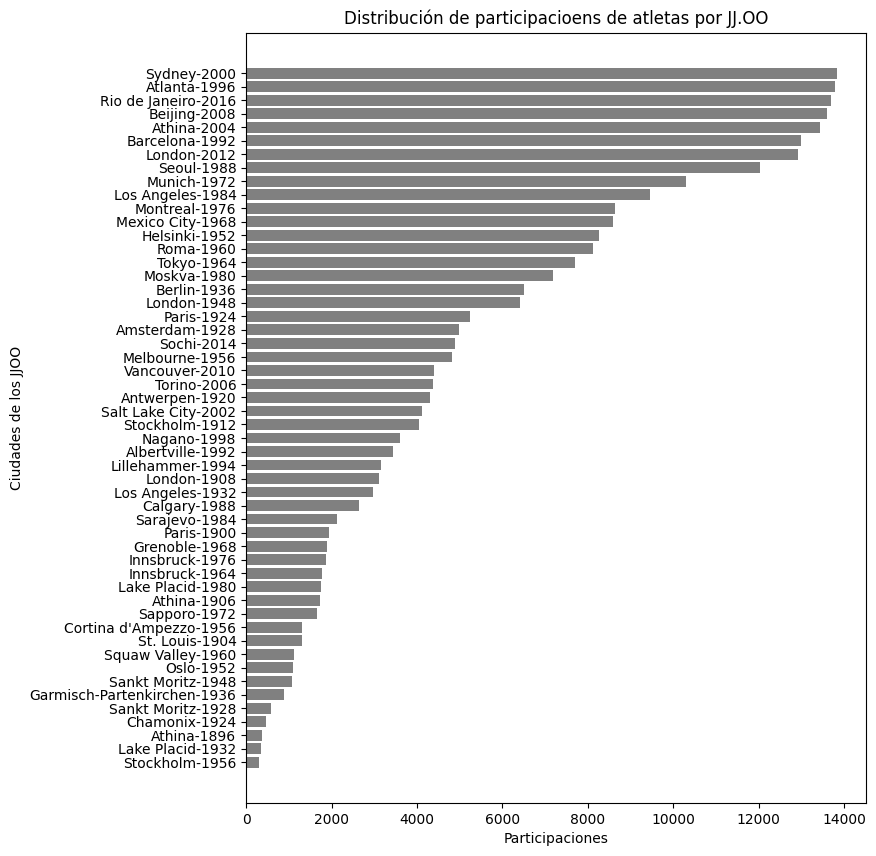

In [ ]:
#Veremos las 10 ciudades que mas participaciones de atletas han tenido, le sumamos el año de los JJOO para visualizar correctamente que juego tuvo mas participacioens de atletas.
top_10_name = (events_df['City']+'-'+events_df['Year'].astype(str)).value_counts().sort_values(ascending=True)

#Gráfico
plt.figure(figsize=(8,10))
plt.barh(top_10_name.index,top_10_name.values, color='gray')
plt.xticks(rotation=0)
plt.xlabel('Participaciones')
plt.ylabel('Ciudades de los JJOO')
plt.title('Distribución de participacioens de atletas por JJ.OO')
plt.show()

#### Deporte (Sports)
Atletismo es la disciplina que por lejos tiene mas participaciones, esto por 2 razones fundamentales, es el deporte que ha estado representado en todos los JJ.OO (no invierno) desde Athina 1892 y es un tipo de deporte con varias especialidades y pruebas, lo que permite que las delegaciones lleven equipos mas grandes.

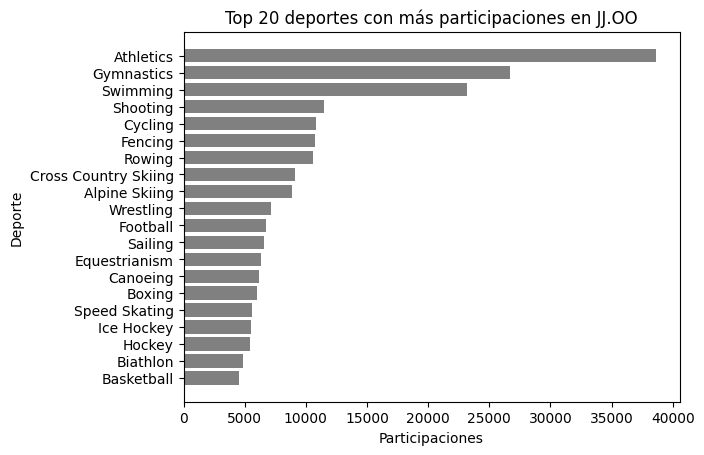

In [ ]:
#Veremos las 20 deportes que mas participaciones de atletas han tenido
top_10_name = events_df['Sport'].value_counts().head(20).sort_values(ascending=True)

#Gráfico
plt.figure()
plt.barh(top_10_name.index,top_10_name.values, color='gray')
plt.xticks(rotation=0)
plt.xlabel('Participaciones')
plt.ylabel('Deporte')
plt.title('Top 20 deportes con más participaciones en JJ.OO')
plt.show()

### Events
Veremos las 20 Eventos que mas participaciones de atletas han tenido, se observa que las disciplinas grupales masculinas dominan el # de participaciones. Siendo el ciclismo masculino la 1era disciplina individual en aparecer en el ranking con el 6to lugar (por la cantidad de deportistas que entran en carrera)

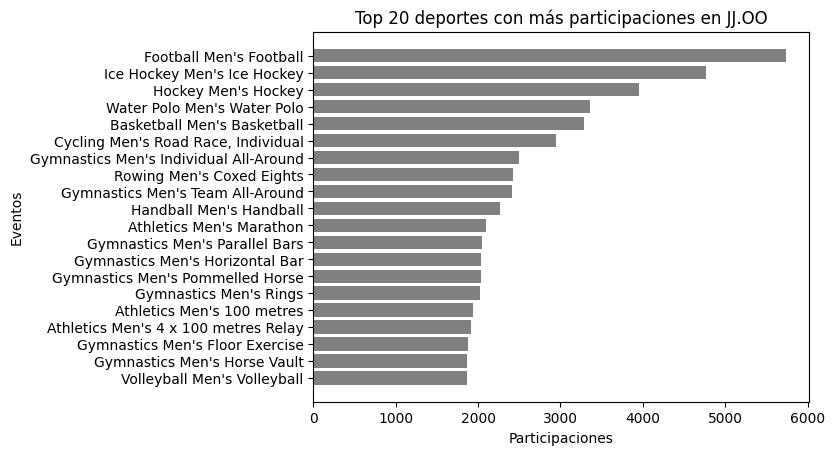

In [ ]:
#Veremos las 20 Eventos que mas participaciones de atletas han tenido
top_10_name = events_df['Event'].value_counts().head(20).sort_values(ascending=True)

#Gráfico de barra horizontal de matplotlib
plt.figure()
plt.barh(top_10_name.index,top_10_name.values, color='gray')
plt.xticks(rotation=0)
plt.xlabel('Participaciones')
plt.ylabel('Eventos')
plt.title('Top 20 deportes con más participaciones en JJ.OO')
plt.show()

#### Medallas
Vemos que de todas las participaciones en los JJOO las posibilidades de ganar medalla son bajísimas, es decir hay una gran cantidad de participantes por solo 3 premios por categoría.

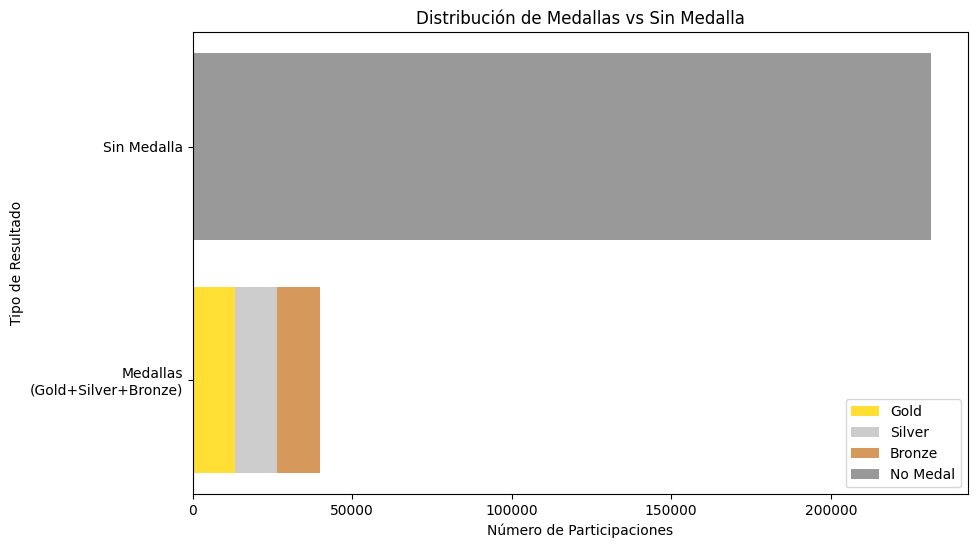

In [ ]:
# Tu código original
top_10_name = events_df['Medal'].fillna('No Medal').value_counts()

# Separar los datos
medallas = ['Gold', 'Silver', 'Bronze']  # Las 3 que quieres stackear
no_medal = 'No Medal'  # Label para los sin medalla

# Extraeemos los valores usando get
gold_count = top_10_name.get('Gold', 0)
silver_count = top_10_name.get('Silver', 0)
bronze_count = top_10_name.get('Bronze', 0)
no_medal_count = top_10_name.get('No Medal', 0)

#Gráfico de barras horizontal seárando los medallistas y el resto
plt.figure(figsize=(10, 6))

# Posiciones para las barras
y_pos = [0, 1]  # Una para medallas stacked, otra para no medal
labels = ['Medallas\n(Gold+Silver+Bronze)', 'Sin Medalla']

# Barra stacked para medallas
plt.barh(y_pos[0], gold_count, label='Gold', color='gold', alpha=0.8)
plt.barh(y_pos[0], silver_count, left=gold_count, label='Silver', color='silver', alpha=0.8)
plt.barh(y_pos[0], bronze_count, left=gold_count+silver_count, label='Bronze', color='#CD7F32', alpha=0.8)

# Barra independiente para No Medal
plt.barh(y_pos[1], no_medal_count, label='No Medal', color='gray', alpha=0.8)

plt.yticks(y_pos, labels)
plt.xlabel('Número de Participaciones')
plt.ylabel('Tipo de Resultado')
plt.title('Distribución de Medallas vs Sin Medalla')
plt.legend()
plt.show()

## B.- Busqueda de relación de variables continuas con categóricas

### Apertura de Año juegos y edad , revisión por otras categóricas

#### Año juegos y edad de los atletas por temporada de los juegos

Primero señalar que se observa como la edad general se ha ido concentrando con el tiempo (sobre todo la cota superior)

Y se observa claramente como los atletas de JJ.OO de invierno son en términos generales menos longevos que los de juegos de verano (mas evidente cuando se separan los eventos)

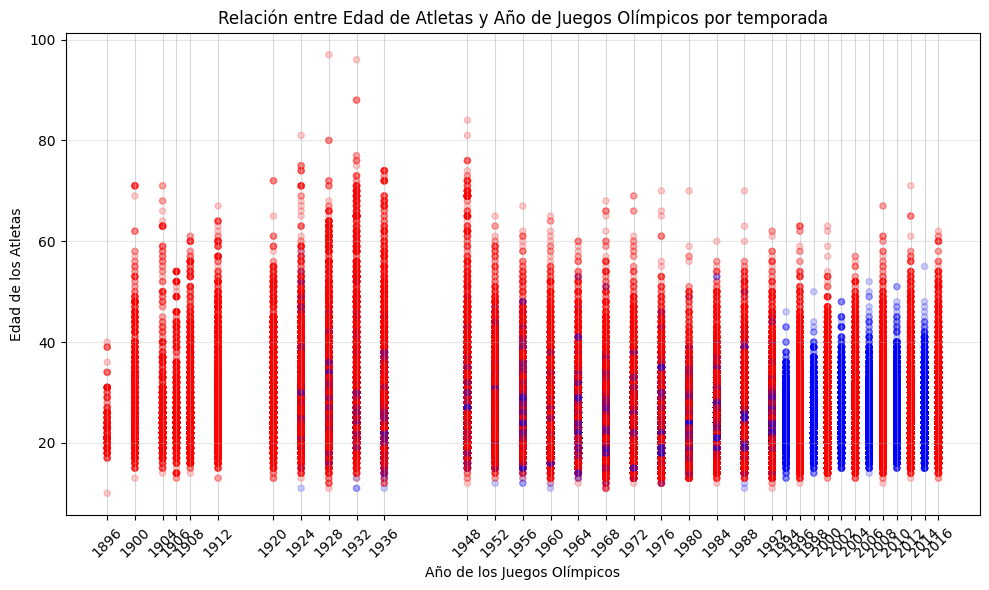

In [ ]:
clean_data = events_df.dropna(subset=['Age'])

# Diccionario para los colores por temporada(Season)
colorbar ={ "Summer":'red', "Winter":'blue'}

# Obtener los años únicos de Juegos Olímpicos en tu dataset
olympic_years = sorted(clean_data['Year'].unique())


#Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Year'], clean_data['Age'], color=clean_data['Season'].replace(colorbar),label =clean_data['Season'] ,alpha=0.2, s=20)
plt.xlabel('Año de los Juegos Olímpicos')
plt.ylabel('Edad de los Atletas')
plt.title('Relación entre Edad de Atletas y Año de Juegos Olímpicos por temporada')
# Configurar grilla vertical solo en años olímpicos
plt.xticks(olympic_years, rotation=45)
plt.grid(True, alpha=0.3, axis='y')  # grid horizontal normal
plt.grid(True, alpha=0.5, axis='x')  # grid vertical en años olímpicos
plt.tight_layout()
plt.show()

#### Año juegos y edad de los atletas por género

Se observa claramente como a contar de los juegos post-guerra II de Londres 48' se empieza a contar con mayor presencia femenina, esto se intensifica posterior a la profesionalización con Seul 88'.

Respecto  a las edades, también se observa un cambio importante, donde las mujeres sólo aparecían en rangos muy jóvenes de edad y a partir de la profesionalización se empareja un poco su distribución de edad respecto de los hombres.

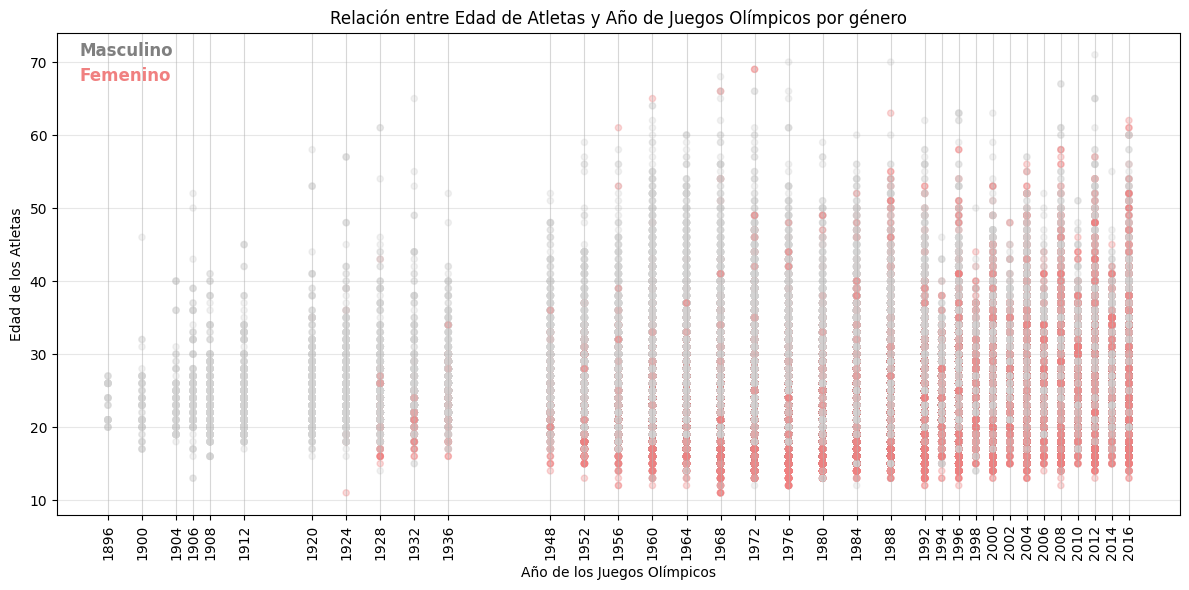

In [ ]:
# Diccionario para los colores por Gémero(Sex)
colorbar ={"M":'lightgray',"F":'lightcoral'}

# Obtener los años únicos de Juegos Olímpicos en tu dataset
olympic_years = sorted(clean_data['Year'].unique())

#Gráfico
plt.figure(figsize=(12, 6))
plt.scatter(clean_data['Year'], clean_data['Age'], color=clean_data['Sex'].replace(colorbar),label =clean_data['Sex'] ,alpha=0.3, s=20)
plt.xlabel('Año de los Juegos Olímpicos')
plt.ylabel('Edad de los Atletas')
plt.title('Relación entre Edad de Atletas y Año de Juegos Olímpicos por género')

# Configurar grilla vertical solo en años olímpicos
plt.xticks(olympic_years, rotation=90)
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.grid(True, alpha=0.5, axis='x')  # Grilla vertical en años olímpicos

# Añadir texto explicativo con colores
plt.text(0.02, 0.98, 'Masculino',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='gray',  # Color gris para Masculino
         fontsize=12, fontweight='bold')

plt.text(0.02, 0.93, 'Femenino',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightcoral',  # Color coral para Femenino
         fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### Relación entre edad de los atletas y el año de competencia por medallas

La tendencia a tener medallas ha pasado desde el rango de 20-30 en los albores de los JJ.OO a 30-40 a partir de Seul 88', seguramente también es un efecto cruzado entre la profesionalización y el aumento general de la esperanza de vida y rendimiento deportivo (gracias a la tecnología)

/tmp/ipython-input-891831169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Medal'].fillna('No Medal', inplace = True)


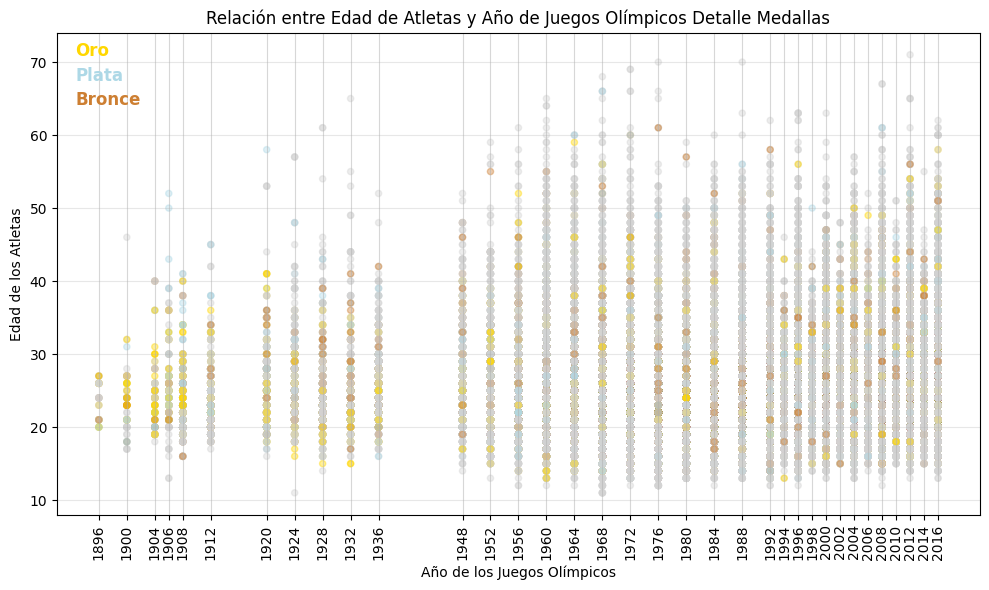

In [ ]:
# Obtener los años únicos de Juegos Olímpicos en tu dataset
olympic_years = sorted(clean_data['Year'].unique())

# Remplazar los nulos por sin medalla
clean_data['Medal'].fillna('No Medal', inplace = True)

# Diccionario para los colores por Medalla
colorbar ={"Gold":'gold',"Silver":'lightblue',"Bronze":'#CD7F32', "No Medal":'lightgray'}

#Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Year'], clean_data['Age'], color=clean_data['Medal'].replace(colorbar),label =clean_data['Medal'] ,alpha=0.4, s=20)
plt.xlabel('Año de los Juegos Olímpicos')
plt.ylabel('Edad de los Atletas')
plt.title('Relación entre Edad de Atletas y Año de Juegos Olímpicos Detalle Medallas')

# Configurar grilla vertical solo en años olímpicos
plt.xticks(olympic_years, rotation=90)
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.grid(True, alpha=0.5, axis='x')  # Grilla vertical en años olímpicos

# Añadir texto explicativo con colores
plt.text(0.02, 0.98, 'Oro',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='gold',  # Color gris para Oro
         fontsize=12, fontweight='bold')

plt.text(0.02, 0.93, 'Plata',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightblue',  # Color coral para Plata
         fontsize=12, fontweight='bold')

plt.text(0.02, 0.88, 'Bronce',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='#CD7F32',  # Color coral para Bronze
         fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### Relación entre edad de los atletas y el año de competencia por  Ciudad
Ciudad no aplica ya que tiene literalmente la misma información que el eje x del gráfico anterior, se podría sumar a los Xticks, para todos los otros gráficos de edad vs año pero no nos gustó el resultado.

#### Relación entre edad de los atletas y el año de competencia por Deporte

Se observa que existiendo un caos en los princiíos de los JJ.OO respecto de las edades de los Top 3 deportes mas populares (Atletismo, Gimnasia y Natación) en ese orden. Tenemos que a medida que se consolidan los JJ.OO se va ordenando las edades típicas por deporte, siendo natación más bajo en edad, seguido de gimnasia y finalmente mucho mas arriba atletismo.

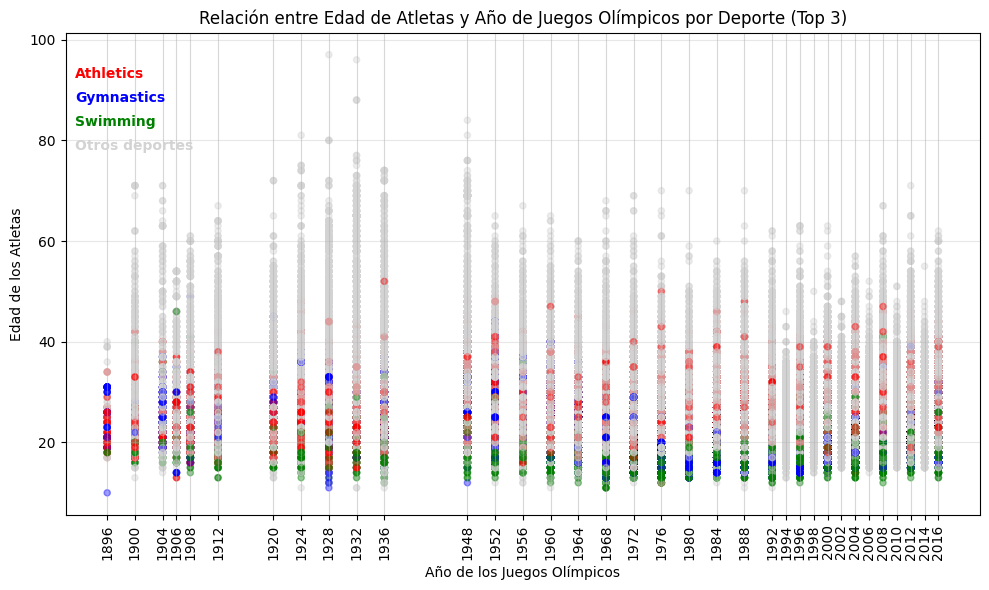

In [ ]:
#Limpiamos la data
clean_data = events_df.dropna(subset=['Sport'])

# Identificamos los 3 deportes más frecuentes, mi idea original era el top 5 con los colores olimpicos pero no se ve bien
top_3_sports = clean_data['Sport'].value_counts().head(3) #Solo hay que cambiar acá por 5
#print("Top 3 deportes más frecuentes:")
#print(top_3_sports)

# Creamos lista de los nombres de los top 3 deportes
top_sports_list = top_3_sports.index.tolist()

# Diccionario de colores para los top 3 deportes
sport_colors = {
    top_sports_list[0]: 'red',        # Atletismo #1
    top_sports_list[1]: 'blue',       # Gimnasia  #2
    top_sports_list[2]: 'green',      # Natación  #3
} #acá agregar los 2 que faltarían

# Función para asignar colores
def get_sport_color(sport):
    if sport in top_sports_list:
        return sport_colors[sport]
    else:
        return 'lightgray'

# Crear columna de colores, acá la salida fue usar apply para iterar la función get_sport_color por toda la serie Sport
clean_data_copy = clean_data.copy()
clean_data_copy['color'] = clean_data_copy['Sport'].apply(get_sport_color)

# Obtener los años únicos de Juegos Olímpicos
olympic_years = sorted(clean_data['Year'].unique())

# Gráfico scatterplot para el Top 3 de deportes con mas participaciones
plt.figure(figsize=(10, 6))
plt.scatter(clean_data_copy['Year'], clean_data_copy['Age'],
           color=clean_data_copy['color'], alpha=0.4, s=20)
plt.xlabel('Año de los Juegos Olímpicos')
plt.ylabel('Edad de los Atletas')
plt.title('Relación entre Edad de Atletas y Año de Juegos Olímpicos por Deporte (Top 3)')

# Configuramos grid vertical solo en años olímpicos
plt.xticks(olympic_years, rotation=90)
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.grid(True, alpha=0.5, axis='x')  # Grilla vertical en años olímpicos

# Se añade texto explicativo con colores correspondientes
y_positions = [0.98, 0.93, 0.88, 0.83]  # Posiciones verticales para cada línea

# Legenda Top 3 deportes con sus colores
for i, (sport, color) in enumerate(sport_colors.items()):
    plt.text(0.01, y_positions[i+1], f'{sport}',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             color=color, fontsize=10, fontweight='bold')

# Añadir línea para "otros deportes"
plt.text(0.01, 0.78, f'Otros deportes',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightgray', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### Relación entre edad de los atletas y el año de competencia por Equipo (País federación)

Revisaremos el Top 3 Equipos (federaciones) con mas atletas/participaciones en JJ.OO.

Se observa que en la parte de espiritu mas amateur de los JJ.OO, los equipos sobrerepresentaban los juegos, eso se fue regularizando en la etapa de consolidación en Londres 48' en adelante.

No se observa un patron particular para la edad

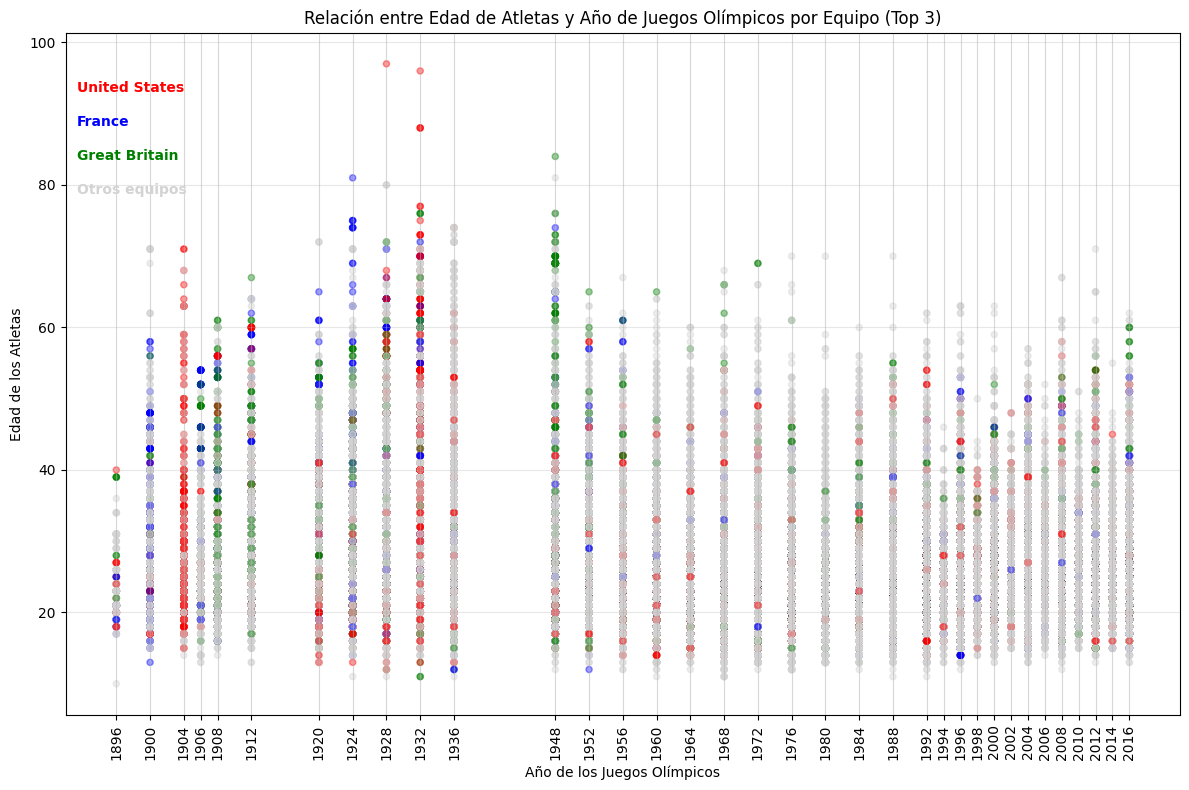

In [ ]:
#Limpiamos la data
clean_data = events_df.dropna(subset=['Team'])

# Identificamos los 3 Equipos más frecuentes
top_3_teams = clean_data['Team'].value_counts().head(3)

# Creamos lista de los nombres de los top 3 deportes
top_teams_list = top_3_teams.index.tolist()

# Diccionario de colores para los top 3 deportes
team_colors = {
    top_teams_list[0]: 'red',        # Atletismo #1
    top_teams_list[1]: 'blue',       # Gimnasia  #2
    top_teams_list[2]: 'green',      # Natación  #3
} #acá agregar los 2 que faltarían

# Función para asignar colores
def get_team_color(team):
    if team in top_teams_list:
        return team_colors[team]
    else:
        return 'lightgray'

# Crear columna de colores, se usa apply para iterar la función get_team_color por toda la serie Team
clean_data_copy = clean_data.copy()
clean_data_copy['color'] = clean_data_copy['Team'].apply(get_team_color)

# Obtener los años únicos de Juegos Olímpicos
olympic_years = sorted(clean_data['Year'].unique())

# Gráfico scatterplot para el Top 3 de deportes con mas participaciones
plt.figure(figsize=(12, 8))
plt.scatter(clean_data_copy['Year'], clean_data_copy['Age'],
           color=clean_data_copy['color'], alpha=0.4, s=20)
plt.xlabel('Año de los Juegos Olímpicos')
plt.ylabel('Edad de los Atletas')
plt.title('Relación entre Edad de Atletas y Año de Juegos Olímpicos por Equipo (Top 3)')

# Configuramos grid vertical solo en años olímpicos
plt.xticks(olympic_years, rotation=90)
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.grid(True, alpha=0.5, axis='x')  # Grilla vertical en años olímpicos

# Se añade texto explicativo con colores correspondientes
y_positions = [0.98, 0.93, 0.88, 0.83]  # Posiciones verticales para cada línea

# Legenda Top 3 equipos con sus colores
for i, (team, color) in enumerate(team_colors.items()):
    plt.text(0.01, y_positions[i+1], f'{team}',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             color=color, fontsize=10, fontweight='bold')

# Añadir línea para "otros deportes"
plt.text(0.01, 0.78, f'Otros equipos',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightgray', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### Relación entre edad  y el año de competencia para los deportistas con mas participaciones.



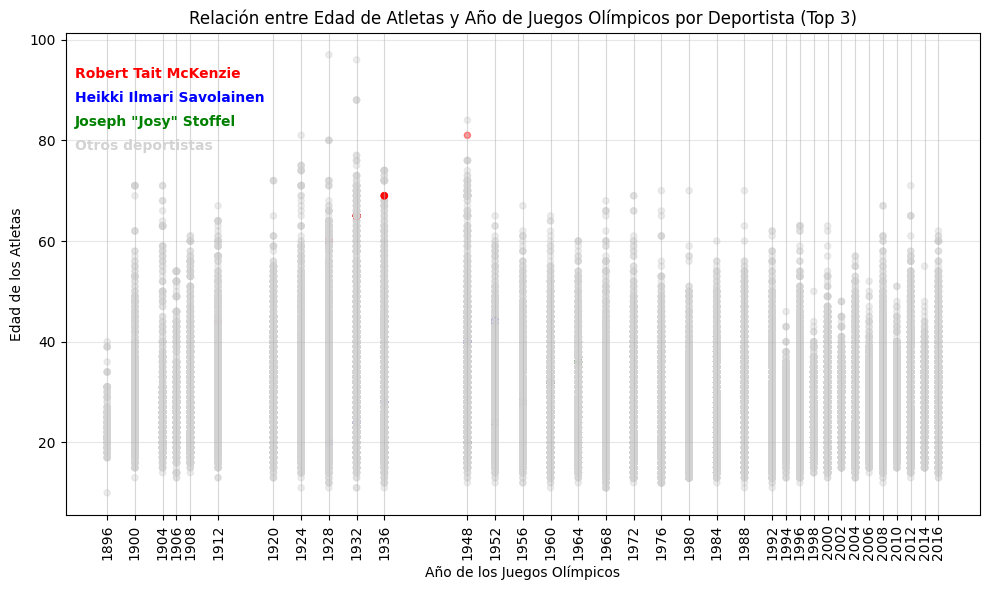

In [ ]:
#Limpiamos la data
clean_data = events_df.dropna(subset=['Name'])

# Identificamos los 3 Equipos más frecuentes
top_3_names = clean_data['Name'].value_counts().head(3)

# Creamos lista de los nombres de los top 3 deportistas
top_names_list = top_3_names.index.tolist()

# Diccionario de colores para los top 3 deportistas
name_colors = {
    top_names_list[0]: 'red',        # deportista #1
    top_names_list[1]: 'blue',       # deportista  #2
    top_names_list[2]: 'green',      # deportista  #3
}

# Función para asignar colores
def get_name_color(name):
    if name in top_names_list:
        return name_colors[name]
    else:
        return 'lightgray'

# Crear columna de colores, se usa apply para iterar la función get_name_color por toda la serie Team
clean_data_copy = clean_data.copy()
clean_data_copy['color'] = clean_data_copy['Name'].apply(get_name_color)

# Obtener los años únicos de Juegos Olímpicos
olympic_years = sorted(clean_data['Year'].unique())

# Gráfico scatterplot para el Top 3 de deportistas con mas participaciones
plt.figure(figsize=(10, 6))
plt.scatter(clean_data_copy['Year'], clean_data_copy['Age'],
           color=clean_data_copy['color'], alpha=0.4, s=20)
plt.xlabel('Año de los Juegos Olímpicos')
plt.ylabel('Edad de los Atletas')
plt.title('Relación entre Edad de Atletas y Año de Juegos Olímpicos por Deportista (Top 3)')

# Configuramos grid vertical solo en años olímpicos
plt.xticks(olympic_years, rotation=90)
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.grid(True, alpha=0.3, axis='x')  # Grilla vertical en años olímpicos

# Se añade texto explicativo con colores correspondientes
y_positions = [0.98, 0.93, 0.88, 0.83]  # Posiciones verticales para cada línea

# Legenda Top 3 deportistas con sus colores
for i, (name, color) in enumerate(name_colors.items()):
    plt.text(0.01, y_positions[i+1], f'{name}',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             color=color, fontsize=10, fontweight='bold')

# Añadir línea para "otros deportistas"
plt.text(0.01, 0.78, f'Otros deportistas',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightgray', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Apertura de altura y peso, revisión por otras categóricas


En 1er lugar señalar que se observa correlación positiva enre peso y altura (algo bastante lógico).



#### Altura y peso por temporada de JJ.OO
Para el caso particular de la apertura por juegos de invierno, se ve mas o menos la misma tendencia, sin embargo se puede comentar que los casos que agregan mayor dispersión al scatterplot son de los juegos de verano.

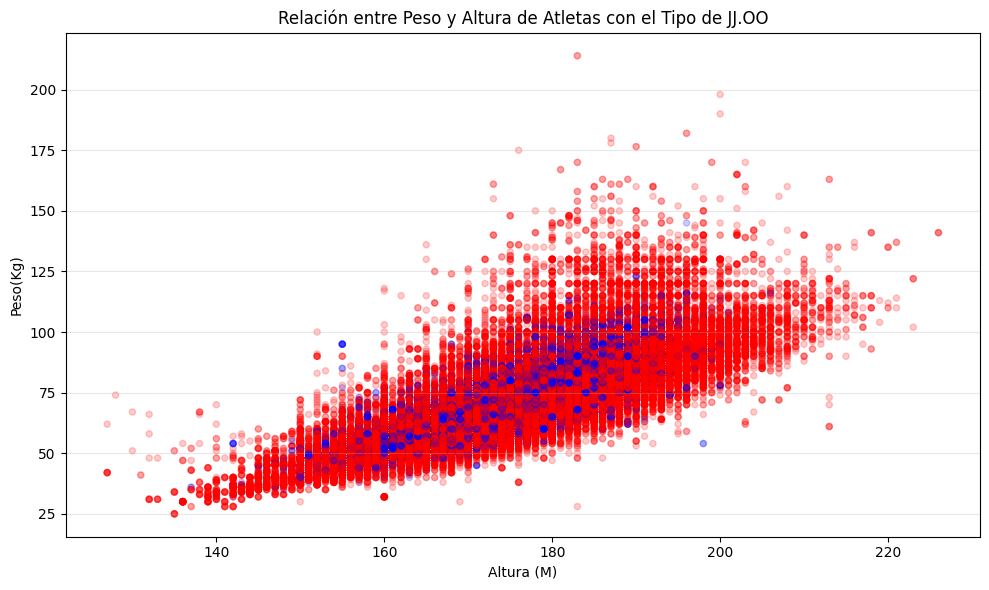

In [ ]:
# Diccionario para los colores por temporada(Season)
colorbar ={ "Summer":'red', "Winter":'blue'}

#Eliminamos los nulos para el análisis
clean_data = events_df.dropna(subset=['Height','Weight'])

#Gráfico de scatterpot abierto por género
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Height'],
            clean_data['Weight'],
            color=clean_data['Season'].replace(colorbar),
            label =clean_data['Season'] ,
            alpha=0.2,
            s=20)
plt.xlabel('Altura (M)')
plt.ylabel('Peso(Kg)')
plt.title('Relación entre Peso y Altura de Atletas con el Tipo de JJ.OO')
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal



plt.tight_layout()
plt.show()

#### Medallistas por Altura y Peso
No se observa a simple vista un patrón (al menos visualmente) entre altura, peso y la posbilidad de obtener una medalla. cosa que debe estar bastante relacionado con que distintas disciplinas tienen un mix ideal de peso y altura diferente,

/tmp/ipython-input-3907090873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.fillna({'Medal':'No Medal'}, inplace = True)


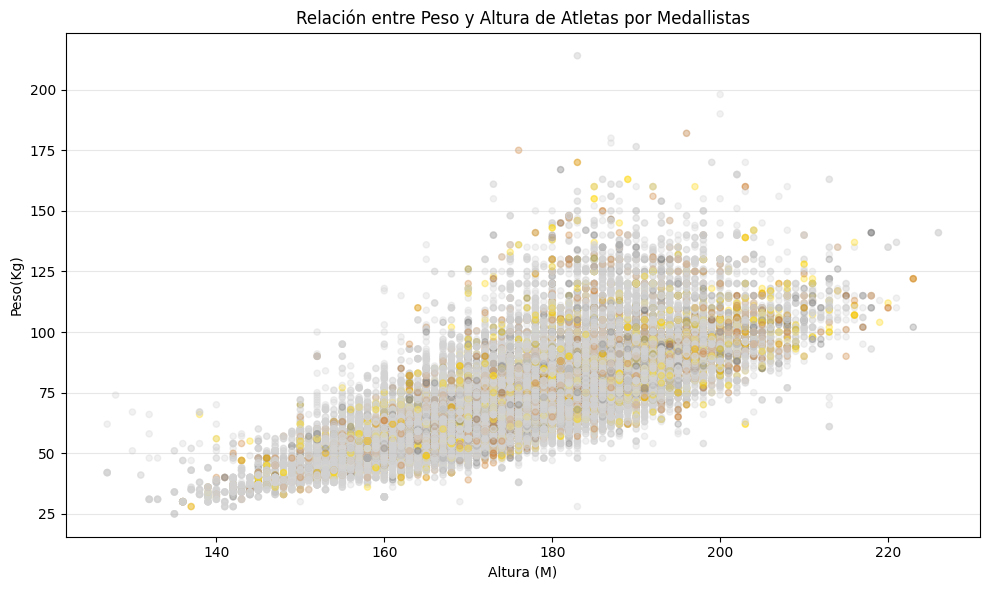

In [ ]:
# Gráfico de scatterplot para analizar medallistas por cruce entre altura y peso

#Eliminamos los nulos para el análisis
clean_data = events_df.dropna(subset=['Height','Weight'])

# Remplazar los nulos por sin medalla
clean_data.fillna({'Medal':'No Medal'}, inplace = True)

# Diccionario para los colores por Medalla
colorbar ={"Gold":'gold',"Silver":'gray',"Bronze":'#CD7F32', "No Medal":'lightgray'}


#Gráfico de scatterpot abierto por medallistas
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Height'],
            clean_data['Weight'],
            color=clean_data['Medal'].replace(colorbar),
            label =clean_data['Medal'] ,
            alpha=0.3,
            s=20)
plt.xlabel('Altura (M)')
plt.ylabel('Peso(Kg)')
plt.title('Relación entre Peso y Altura de Atletas por Medallistas')
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.tight_layout()
plt.show()

#### Altura y peso por género
Se observa claramnte que se separan los casos por género másculino y femenino por altura y peso. Siendo los atletas hombres de mayor peso y altura (como regla general, obviando casos particulare por supuesto). A partir de 1.80m y 75Kg de peso se tiene una preponderancia muy evidente del género masculino.


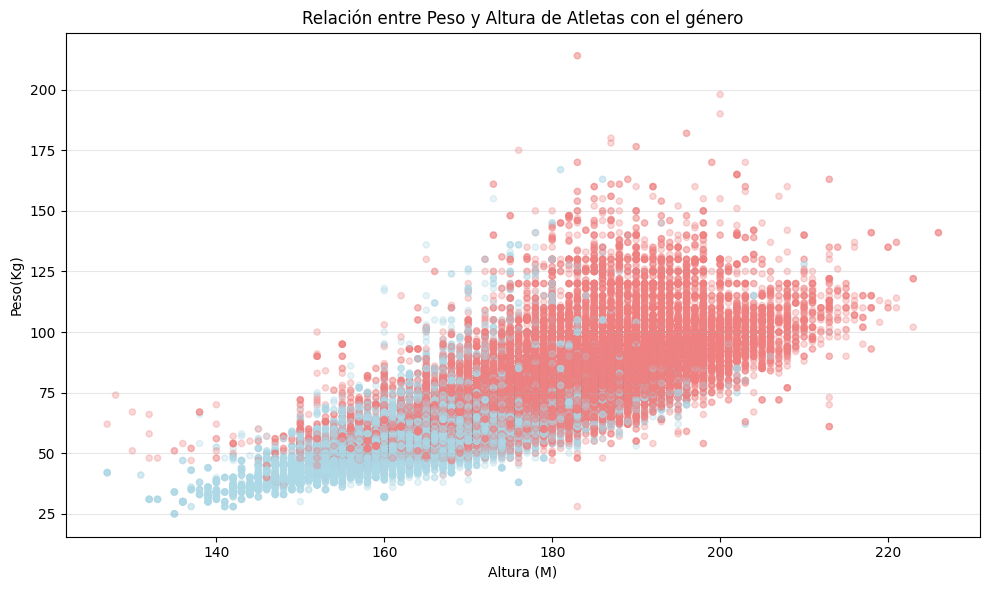

In [ ]:
# Diccionario para los colores por Medallas
colorbar ={"M":'lightcoral',"F":'lightblue'}

#Eliminamos los nulos para el análisis
clean_data = events_df.dropna(subset=['Height','Weight'])

#Gráfico de scatterpot abierto por género
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Height'],
            clean_data['Weight'],
            color=clean_data['Sex'].replace(colorbar),
            label =clean_data['Sex'] ,
            alpha=0.3,
            s=20)
plt.xlabel('Altura (M)')
plt.ylabel('Peso(Kg)')
plt.title('Relación entre Peso y Altura de Atletas con el género')
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.tight_layout()
plt.show()

#### Altura y peso por top 3 delegaciones con mas participantes
No se observa un patrón de peso/altura para los 3 paises (equipos/delegaciones) con mas participantes. Esto debe estar relacionado con que los paises con mas participaciones tienen atletas en todas las disciplinas, y por ello es mas dificil que se enclaustren en un solo tipo de perfil altura/peso.


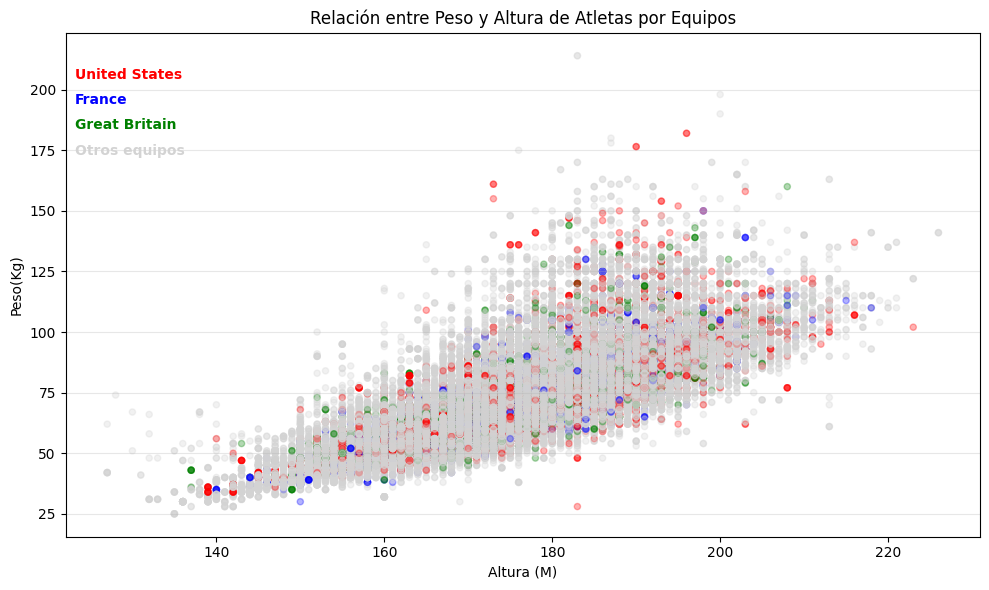

In [ ]:
#Limpiamos la data
clean_data = events_df.dropna(subset=['Team'])

# Identificamos los 3 Equipos más frecuentes
top_3_teams = clean_data['Team'].value_counts().head(3)

# Creamos lista de los nombres de los top 3 deportes
top_teams_list = top_3_teams.index.tolist()

# Diccionario de colores para los top 3 deportes
team_colors = {
    top_teams_list[0]: 'red',        # Atletismo #1
    top_teams_list[1]: 'blue',       # Gimnasia  #2
    top_teams_list[2]: 'green',      # Natación  #3
} #acá agregar los 2 que faltarían

# Función para asignar colores
def get_team_color(team):
    if team in top_teams_list:
        return team_colors[team]
    else:
        return 'lightgray'

# Crear columna de colores, se usa apply para iterar la función get_team_color por toda la serie Team
clean_data_copy = clean_data.copy()
clean_data_copy['color'] = clean_data_copy['Team'].apply(get_team_color)



#Gráfico de scatterpot coloreado por top 3 delegaciones con mas participantes
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Height'],
            clean_data['Weight'],
            color=clean_data_copy['color'],
            label =clean_data['Team'] ,
            alpha=0.3,
            s=20)
plt.xlabel('Altura (M)')
plt.ylabel('Peso(Kg)')
plt.title('Relación entre Peso y Altura de Atletas por Equipos')
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal

# Se añade texto explicativo con colores correspondientes
y_positions = [0.98, 0.93, 0.88, 0.83]  # Posiciones verticales para cada línea

# Legenda Top 3 equipos con sus colores
for i, (team, color) in enumerate(team_colors.items()):
    plt.text(0.01, y_positions[i+1], f'{team}',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             color=color, fontsize=10, fontweight='bold')

# Añadir línea para "otros equipos"
plt.text(0.01, 0.78, f'Otros equipos',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightgray', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### Altura y peso por top 3 deportes con mas atletas participantes.
Se observa claramente al revisar el top 3 de deportes con mas participaciones:
* 1- Atletismo
* 2- Gimnasia
* 3- Natación

Que el estandar para cada disciplina se clusteriza por la combinación Peso/Altura, quizas interesante es ver el caso particular de atletismo, donde subcategorías pueden diferenciar el tipo de perfil del deportista.

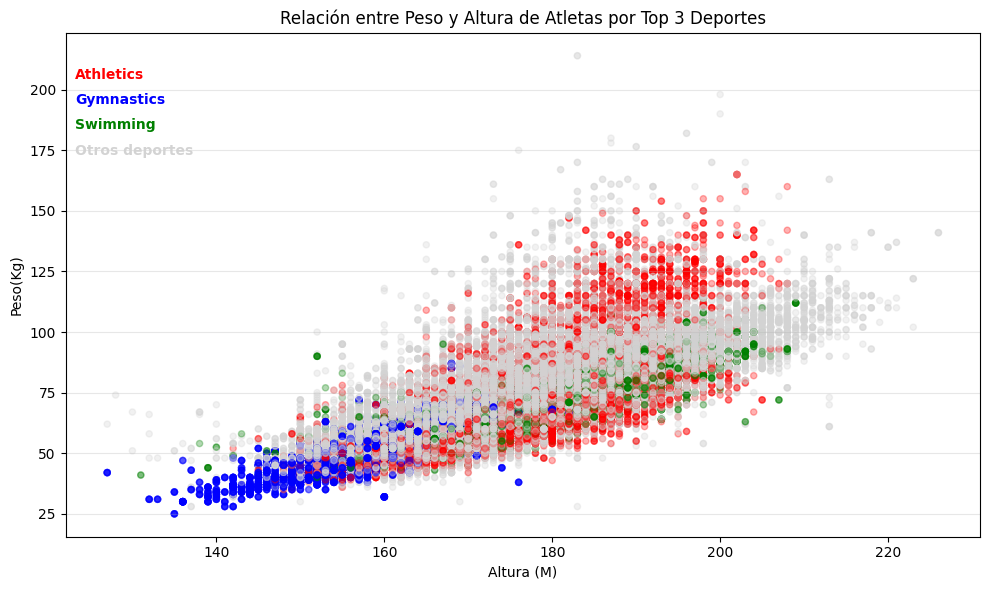

In [ ]:
#Limpiamos la data
clean_data = events_df.dropna(subset=['Sport'])

# Identificamos los 3 deportes más frecuentes, mi idea original era el top 5 con los colores olimpicos pero no se ve bien
top_3_sports = clean_data['Sport'].value_counts().head(3) #Solo hay que cambiar acá por 5
#print("Top 3 deportes más frecuentes:")
#print(top_3_sports)

# Creamos lista de los nombres de los top 3 deportes
top_sports_list = top_3_sports.index.tolist()

# Diccionario de colores para los top 3 deportes
sport_colors = {
    top_sports_list[0]: 'red',        # Atletismo #1
    top_sports_list[1]: 'blue',       # Gimnasia  #2
    top_sports_list[2]: 'green',      # Natación  #3
} #acá agregar los 2 que faltarían

# Función para asignar colores
def get_sport_color(sport):
    if sport in top_sports_list:
        return sport_colors[sport]
    else:
        return 'lightgray'

# Crear columna de colores, acá la salida fue usar apply para iterar la función get_sport_color por toda la serie Sport
clean_data_copy = clean_data.copy()
clean_data_copy['color'] = clean_data_copy['Sport'].apply(get_sport_color)



#Gráfico de scatterpot coloreado por top 3 deportes con mas participantes
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Height'],
            clean_data['Weight'],
            color=clean_data_copy['color'],
            label =clean_data['Sport'] ,
            alpha=0.3,
            s=20)
plt.xlabel('Altura (M)')
plt.ylabel('Peso(Kg)')
plt.title('Relación entre Peso y Altura de Atletas por Top 3 Deportes')
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal


# Se añade texto explicativo con colores correspondientes
y_positions = [0.98, 0.93, 0.88, 0.83]  # Posiciones verticales para cada línea

# Legenda Top 3 deportes con sus colores
for i, (sport, color) in enumerate(sport_colors.items()):
    plt.text(0.01, y_positions[i+1], f'{sport}',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             color=color, fontsize=10, fontweight='bold')

# Añadir línea para "otros deportes"
plt.text(0.01, 0.78, f'Otros deportes',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightgray', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## C- Visualización de las conclusiones

La principal concluisón que podemos comentar es que los juegos olimpicos hana cambiado mucho desde sus origienes hasta la situación  actual, siendo un fiel reflejo de la profesionalización (ocurrida a partir de Seul 1988), y también de los diversos cambios sociales y la cosncepción del deporte mismo.

Tanto para las edades, como las disciplinas, como la distribución del género, se han observado en el tiempo 3 etapas bastante diferenciadas. Que llamaremos:

* A.- Etapa de Espíritu Amateur [1896 -1936]
* B.- Etapa de consoliación post-guerras [1948 - 1984]
* C.- Etapa profesional [1988 - Actualidad]


La visualización donde mejor se puede ver ese fenómeno es el de Año vs Edad por género.

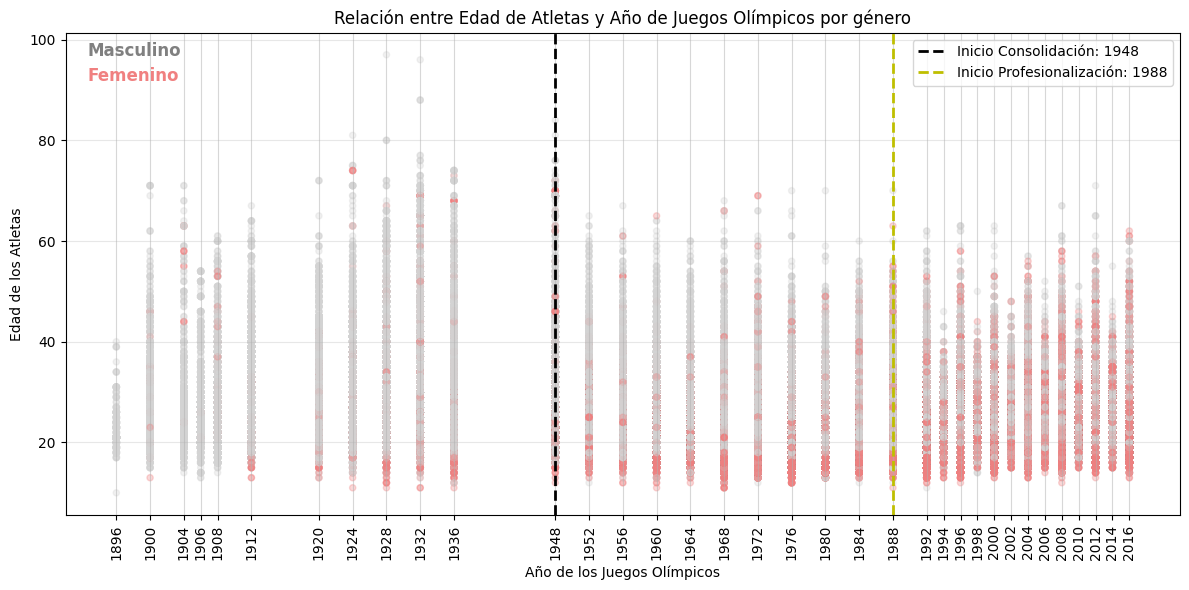

In [ ]:
# Diccionario para los colores por Gémero(Sex)
colorbar ={"M":'lightgray',"F":'lightcoral'}

# Obtener los años únicos de Juegos Olímpicos en tu dataset
olympic_years = sorted(clean_data['Year'].unique())

#Gráfico
plt.figure(figsize=(12, 6))
plt.scatter(clean_data['Year'], clean_data['Age'], color=clean_data['Sex'].replace(colorbar),label ='_nolegend_' ,alpha=0.3, s=20)
plt.xlabel('Año de los Juegos Olímpicos')
plt.ylabel('Edad de los Atletas')
plt.title('Relación entre Edad de Atletas y Año de Juegos Olímpicos por género')

# Configurar grilla vertical solo en años olímpicos
plt.xticks(olympic_years, rotation=90)
plt.grid(True, alpha=0.3, axis='y')  # Grilla horizontal normal
plt.grid(True, alpha=0.5, axis='x')  # Grilla vertical en años olímpicos

# Añadir texto explicativo con colores
plt.text(0.02, 0.98, 'Masculino',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='gray',  # Color gris para Masculino
         fontsize=12, fontweight='bold')

plt.text(0.02, 0.93, 'Femenino',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         color='lightcoral',  # Color coral para Femenino
         fontsize=12, fontweight='bold')

#Añadir 1er corte
plt.axvline(1948, color='k', linestyle='--', linewidth=2,
           label=f'Inicio Consolidación: 1948')

#Añadir 2do corte
plt.axvline(1988, color='y', linestyle='--', linewidth=2,
           label=f'Inicio Profesionalización: 1988')

plt.legend()
plt.tight_layout()
plt.show()

## Referencias
[1] https://www.sports-reference.com/

[2] https://olympstats.com/

[3] Pandas Development Team. (2024). *pandas: Python Data Analysis Library* (Version 2.2.2) [Computer software]. https://pandas.pydata.org/

[4] J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007. https://matplotlib.org/

[5] Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.

[6] Heikki Savolainen, Helsingo Sanomat, https://www.hs.fi/muistot/art-2000002624578.html

[7] R. Tait (Robert Tait) McKenzie Papers, https://archives.upenn.edu/collections/finding-aid/upt50mck37/#BIOGRAPHICAL%20NOTE